## P4
Małgorzata Kurcjusz-Gzowska 


Do poprawy:
- exercise 1: dane z rozkładem pareto
- exercise 7: wyprowadzenie na kartce

Wtedy powinny być 2 punkty więcej (za exercises i P4.1)

In [134]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from scipy.io import mmread
import pandas as pd
import networkx as nx
from collections import defaultdict
import plotly.express as px

#### Exercise 1. Import the data, draw their histogram.

In [144]:
## dane z rozkładem pareto 
data = px.data.gapminder()
gdp = data[data['year'] == 2007]['gdpPercap']

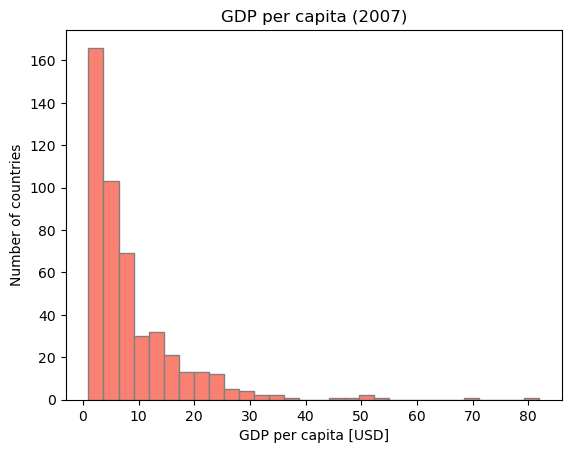

In [149]:
plt.hist(weights, bins=30, color='salmon', edgecolor='gray')
plt.title('GDP per capita (2007)')
plt.xlabel('GDP per capita [USD]')
plt.ylabel('Number of countries')
plt.show()

#### Exercise 2. Correct the scale of the plot's axes to double logarithmic.

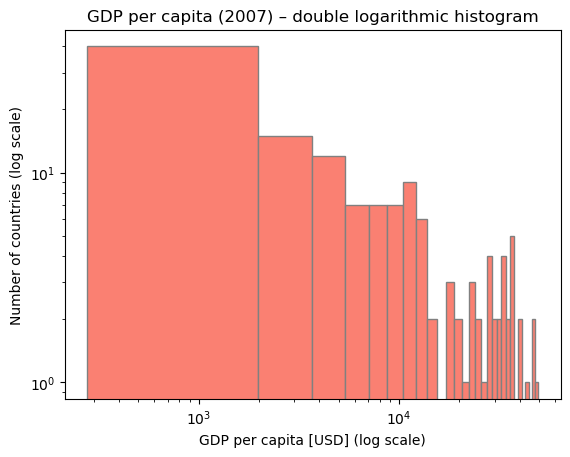

In [155]:
bins = np.linspace(gdp.min(), gdp.max(), 30)

plt.hist(gdp, bins=bins, edgecolor='gray', color="salmon")

# 4. Apply double logarithmic scale
plt.xscale('log')
plt.yscale('log')

# 5. Titles and labels
plt.title('GDP per capita (2007) – double logarithmic histogram')
plt.xlabel('GDP per capita [USD] (log scale)')
plt.ylabel('Number of countries (log scale)')
plt.show()

#### Exercise 3. Apply logarithmic binning as well.

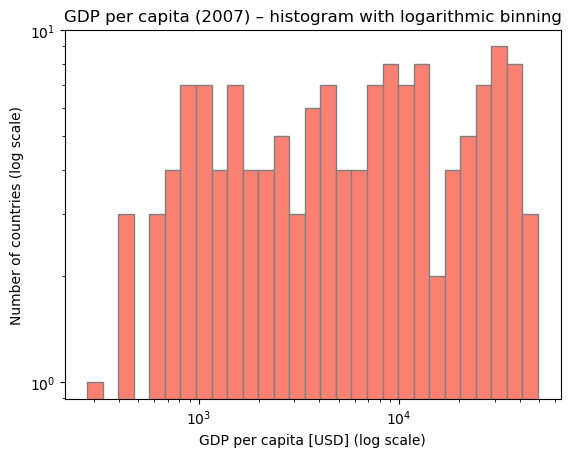

In [157]:
bins = np.logspace(np.log10(gdp.min()), np.log10(gdp.max()), 30)

plt.hist(gdp, bins=bins, edgecolor='gray', color="salmon")
plt.xscale('log')
plt.yscale('log')
plt.title('GDP per capita (2007) – histogram with logarithmic binning')
plt.xlabel('GDP per capita [USD] (log scale)')
plt.ylabel('Number of countries (log scale)')
plt.show()

#### Exercise 4. Compute and draw the survival function.

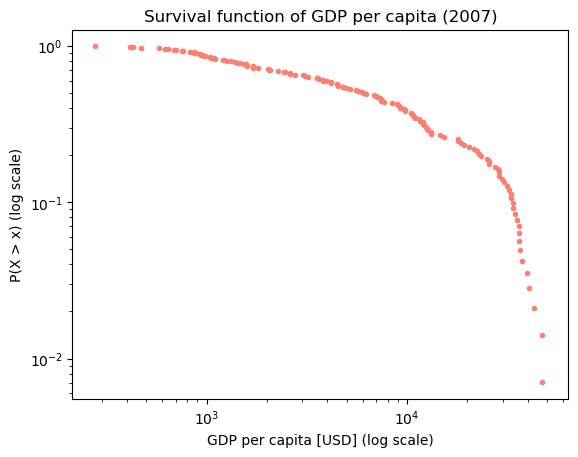

In [160]:
gdp = data[data['year'] == 2007]['gdpPercap'].sort_values()

#  survival function
n = len(gdp)
survival = 1.0 - np.arange(1, n + 1) / n  # P(X > x)
x = np.array(gdp)

# survival function in log–log scale
plt.plot(x, survival, marker='.', linestyle='none', color="salmon")
plt.xscale('log')
plt.yscale('log')
plt.title('Survival function of GDP per capita (2007)')
plt.xlabel('GDP per capita [USD] (log scale)')
plt.ylabel('P(X > x) (log scale)')
plt.show()

#### Exercise 5. Which chart is the most readable? Which is most robust for the noise?

The regular histogram is the easiest to read when the dataset is small or evenly distributed, but it does not reveal the true structure of heavy-tailed distributions. The log–log histogram shows more clearly whether the data follow a power-law trend, though it can become noisy in the tail where data are sparse. Applying logarithmic binning reduces this noise by combining sparse bins into wider ones, which smooths out fluctuations and makes the overall trend easier to interpret.
The survival function (also on a log–log scale) is the most robust to noise because it uses cumulative probabilities instead of counts. It gives a smoother curve, making it easier to observe the scaling behavior and estimate the exponent even when the data are irregular.

#### Exercise 6. Use the linear regression to the previous plots to determine the parameter alpha estimator.

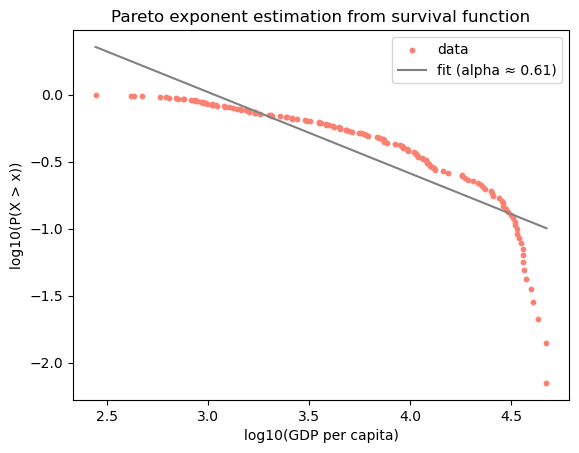

Estimated alpha (Pareto exponent): 0.61


In [164]:
gdp = data[data['year'] == 2007]['gdpPercap'].sort_values()

#  survival function
n = len(gdp)
survival = 1.0 - np.arange(1, n + 1) / n
x = np.array(gdp)

#  log of both sides (remove zeros)
log_x = np.log10(x[survival > 0])
log_surv = np.log10(survival[survival > 0])

#linear regression on log–log data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_surv)
alpha_est = -slope  # Pareto exponent alpha


plt.scatter(log_x, log_surv, s=10, label='data',color="salmon")
plt.plot(log_x, intercept + slope * log_x, color='gray', label=f'fit (alpha ≈ {alpha_est:.2f})')
plt.title('Pareto exponent estimation from survival function')
plt.xlabel('log10(GDP per capita)')
plt.ylabel('log10(P(X > x))')
plt.legend()
plt.show()

print(f"Estimated alpha (Pareto exponent): {alpha_est:.2f}")


#### Exercise 7. Compute (formula and value for our data) MLE estimator for alpha with known x_min assuming distribution.

In [167]:
gdp = data[data['year'] == 2007]['gdpPercap'].values

#minimum
x_min = gdp.min()

# dane x_i >= x_min 
tail = gdp[gdp >= x_min]
n = len(tail)

#  MLE dla alpha
alpha_hat = 1 + n / np.sum(np.log(tail / x_min))

print(f"x_min = {x_min:.3f}")
print(f"Estimated alpha (MLE) = {alpha_hat:.3f}")


x_min = 277.552
Estimated alpha (MLE) = 1.334


#### Exercise 8. How will the result change if we do not know x_min?

If x_min is not known, we can no longer treat it as a fixed constant in the MLE formula. Instead, we must estimate x_min from the data together with alpha. The estimated value of hat_alpha then depends strongly on how x_min is chosen:
- If x_min is chosen too small, we include observations that do not follow the power-law behaviour, which makes the estimated alpha biased (typically too low, indicating a flatter tail).
- If x_min is chosen too large, we only keep a few tail observations, making alpha have high variance and become unstable.

#### P4.1 Collect obtained scripts for power distribution analysis in one file. We will use them again and again. [1P]

Obtained scripts for power distribution analysis are collected in this file

#### P4.2 Prove that for uncorrelated network k_nn(k_i) = k^2/k

#### P4.3 Determine the dependence of the average degree of the nearest neighbour on the degree of the vertex for selected real or artificial networks. [1P]

In [107]:
network1 = nx.read_weighted_edgelist("/Users/gosiakurcjusz/Desktop/2025 2026/DataScience/Social Networks/P2/aves-songbird-social/aves-songbird-social.edges")
network2 = nx.read_edgelist("/Users/gosiakurcjusz/Desktop/2025 2026/DataScience/Social Networks/P2/aves-weaver-social-06/aves-weaver-social-06.edges")
network3 = nx.read_weighted_edgelist("/Users/gosiakurcjusz/Desktop/2025 2026/DataScience/Social Networks/P2/insecta-ant-colony4-day38/insecta-ant-colony4-day38.edges")

In [108]:
def knn_vs_k(G, weight=None):
    """
    Returns:
        ks   – unique degrees
        knn  – average neighbor degree for nodes with degree k
    """
    # degree of each node
    k_dict = dict(G.degree())

    # average degree of neighbors for each node
    knn_node = nx.average_neighbor_degree(G, weight=weight)

    # group by degree k
    by_k = defaultdict(list)
    for v, k in k_dict.items():
        by_k[k].append(knn_node[v])

    ks = np.array(sorted(by_k.keys()))
    knn = np.array([np.mean(by_k[k]) for k in ks])
    return ks, knn

In [109]:
# compute <k_nn>(k) for networks
k1, knn1 = knn_vs_k(network1, weight="weight")
k2, knn2 = knn_vs_k(network2) # unweighted
k3, knn3 = knn_vs_k(network3, weight="weight")

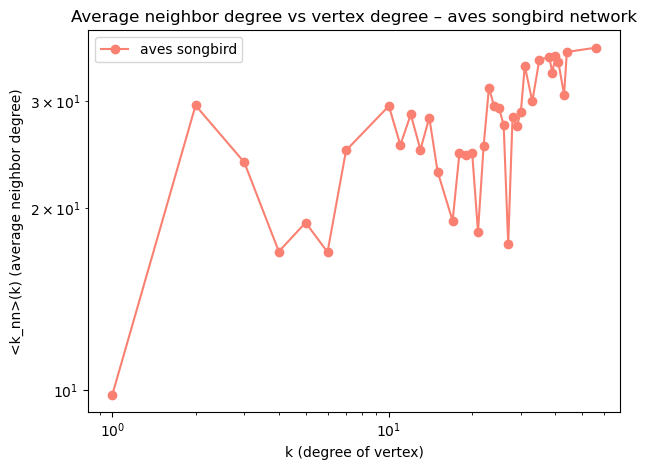

In [110]:
# plot network 1
plt.figure()
plt.loglog(k1, knn1, "o-",color="salmon", label="aves songbird")

plt.xlabel("k (degree of vertex)")
plt.ylabel("<k_nn>(k) (average neighbor degree)")
plt.legend()
plt.title("Average neighbor degree vs vertex degree – aves songbird network")
plt.tight_layout()
plt.show()

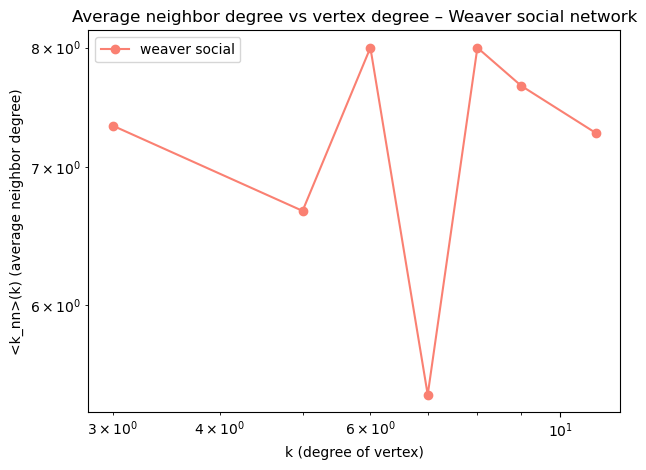

In [111]:
# plot network 2
plt.figure()
plt.loglog(k2, knn2, "o-", color="salmon", label="weaver social")

plt.xlabel("k (degree of vertex)")
plt.ylabel("<k_nn>(k) (average neighbor degree)")
plt.legend()
plt.title("Average neighbor degree vs vertex degree – Weaver social network")
plt.tight_layout()
plt.show()


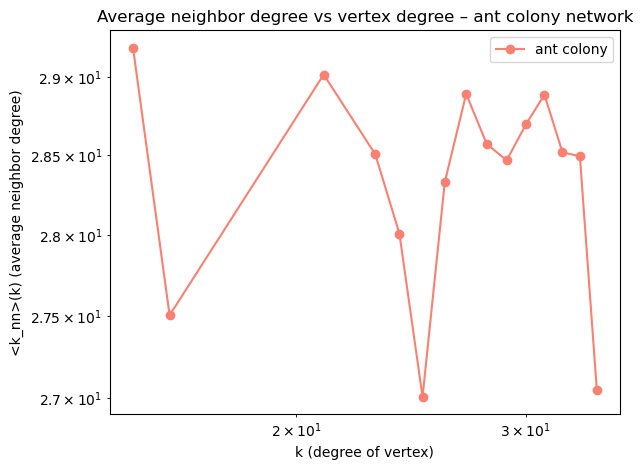

In [112]:
# plot network 3
plt.figure()
plt.loglog(k3, knn3, "o-", color="salmon",label="ant colony")

plt.xlabel("k (degree of vertex)")
plt.ylabel("<k_nn>(k) (average neighbor degree)")
plt.legend()
plt.title("Average neighbor degree vs vertex degree – ant colony network")
plt.tight_layout()
plt.show()

#### P4.4 Check how random edge switching affects the result of the previous task. [1P]

In [113]:
# random edge switching:

def rewire_graph(G, weight=None, factor=3):
    """Performs random edge switching while keeping degree sequence"""
    G_rand = G.copy()
    m = G_rand.number_of_edges()
    nx.double_edge_swap(G_rand, nswap=factor * m, max_tries=factor * 10 * m)
    return G_rand

In [114]:
networks = [
    (network1, "Aves songbird", "weight"),
    (network2, "Aves weaver", None),
    #(network3, "Insecta ant colony", "weight")
]

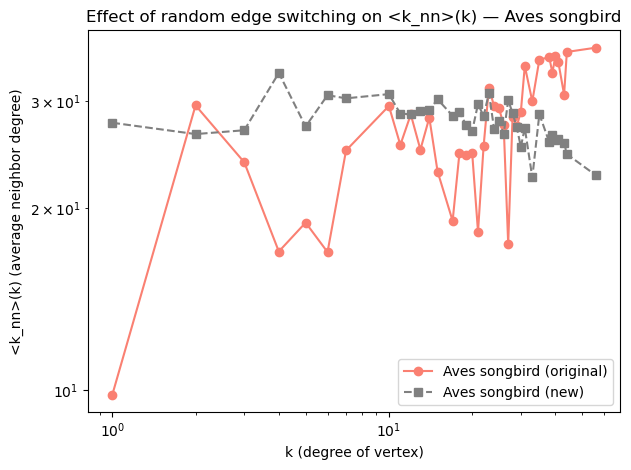

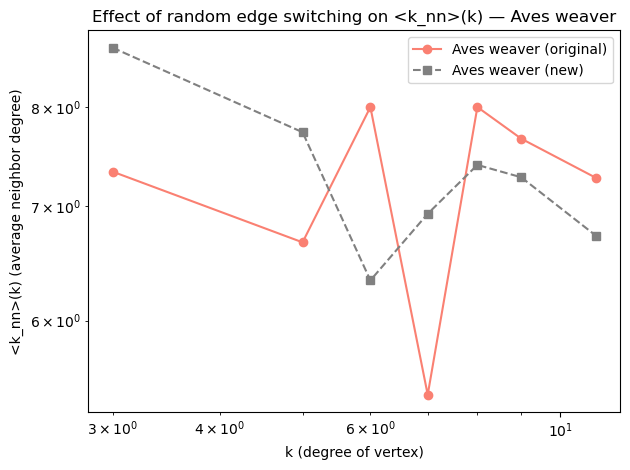

In [115]:
for i, (G, label, w) in enumerate(networks, 1):
  
    k_orig, knn_orig = knn_vs_k(G, weight=w)
    
    G_rand = rewire_graph(G, weight=w)
    k_rand, knn_rand = knn_vs_k(G_rand, weight=w)
    
    plt.figure()
    plt.loglog(k_orig, knn_orig, "o-", color="salmon", label=f"{label} (original)")
    plt.loglog(k_rand, knn_rand, "s--", color="gray", label=f"{label} (new)")
    plt.xlabel("k (degree of vertex)")
    plt.ylabel("<k_nn>(k) (average neighbor degree)")
    plt.title(f"Effect of random edge switching on <k_nn>(k) — {label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [116]:
def rewire_graph_light(G):
    """
    Perform a light random edge rewiring that preserves the degree sequence.
    We swap only ~10% of all edges, but allow many attempts to avoid errors.
    """
    G_rand = G.copy()
    m = G_rand.number_of_edges()

    #number of swaps 10% of all edges, minimum 5
    nswap = max(5, int(0.1 * m))
    #  many attempts to complete those swaps
    max_tries = 100 * nswap

    nx.double_edge_swap(G_rand, nswap=nswap, max_tries=max_tries)
    return G_rand

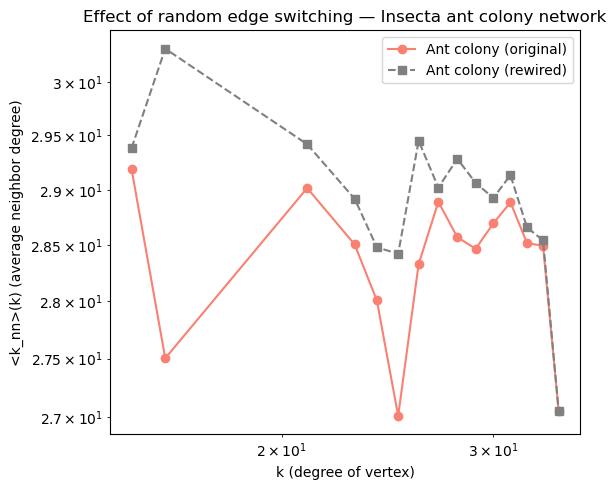

In [69]:
G3_rand = rewire_graph_light(network3)
k3_rand, knn3_rand = knn_vs_k(G3_rand, weight="weight")

plt.figure(figsize=(6, 5))
plt.loglog(k3, knn3, "o-", color="salmon", label="Ant colony (original)")
plt.loglog(k3_rand, knn3_rand, "s--", color="gray", label="Ant colony (rewired)")

plt.xlabel("k (degree of vertex)")
plt.ylabel("<k_nn>(k) (average neighbor degree)")
plt.title("Effect of random edge switching — Insecta ant colony network")
plt.legend()
plt.tight_layout()
plt.show()

#### P4.5 Make the deriviation omitted on the lecture slide. [1P]

#### P4.6 Find the correlation coefficient for the network from task P4.3-P4.4 (before and after switching). [1P]

In [121]:
def correlation_before_after(G, weight=None, label=""):
    """Computes degree correlation coefficient before and after rewiring"""


    r_orig = nx.degree_assortativity_coefficient(G, weight=weight)
    
    G_rand = rewire_graph_light(G)
    r_rand = nx.degree_assortativity_coefficient(G_rand, weight=weight)
    
    print(f"{label}:")
    print(f"  r (original) = {r_orig:.4f}")
    print(f"  r (after switching) = {r_rand:.4f}")
    print()

In [122]:
correlation_before_after(network1, weight="weight", label="Aves songbird network")
correlation_before_after(network2, weight=None, label="Aves weaver network")
correlation_before_after(network3, weight="weight", label="Insecta ant colony network")

Aves songbird network:
  r (original) = -0.1150
  r (after switching) = -0.1015

Aves weaver network:
  r (original) = 0.1526
  r (after switching) = 0.1046

Insecta ant colony network:
  r (original) = -0.0422
  r (after switching) = -0.0803



#### P4.7 Let's fill the above table with metrics of selected real networks, use the built-in functions for counting parameters. Compare the results with the literature. [2.5P]

In [125]:
def network_metrics(G, name, weight=None, alpha=None):
    """
    Compute network metrics for the graph.
    """
    directed = "Yes" if G.is_directed() else "No"
    N = G.number_of_nodes()
    E = G.number_of_edges()
    avg_k = 2 * E / N  # average degree
    r = nx.degree_assortativity_coefficient(G, weight=weight)
    
    # for disconnected graphs, we can't compute average shortest path length directly
    try:
        L = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        # compute for largest connected component
        largest_cc = max(nx.connected_components(G), key=len)
        L = nx.average_shortest_path_length(G.subgraph(largest_cc))
    
    return {
        "Network": name,
        "↔?": directed,
        "N": N,
        "E": E,
        "⟨k⟩": round(avg_k, 2),
        "α": round(alpha, 2) if alpha else "—",
        "ℓ": round(L, 2),
        "r": round(r, 3),
    }

In [128]:
def estimate_alpha_mle(data, xmin=None):
    data = np.array(data)
    if xmin is None:
        xmin = data.min()
    
    data_tail = data[data >= xmin]  #  only values above xmin
    n = len(data_tail)
    
    alpha_hat = 1 + n / np.sum(np.log(data_tail / xmin))
    return alpha_hat

In [130]:
degrees1 = [d for _, d in network1.degree()]
alpha_hat_1 = estimate_alpha_mle(degrees1, xmin=min(degrees1))
print(f"Estimated alpha 1 (Aves songbird): {alpha_hat_1:.3f}")


degrees2 = [d for _, d in network2.degree()]
alpha_hat_2 = estimate_alpha_mle(degrees2, xmin=min(degrees2))
print(f"Estimated alpha 2 (Aves weaver): {alpha_hat_2:.3f}")


degrees3 = [d for _, d in network3.degree()]
alpha_hat_3 = estimate_alpha_mle(degrees3, xmin=min(degrees3))
print(f"Estimated alpha 3 (Insecta ant colony): {alpha_hat_3:.3f}")


Estimated alpha 1 (Aves songbird): 1.391
Estimated alpha 2 (Aves weaver): 2.306
Estimated alpha 3 (Insecta ant colony): 2.703


In [132]:
alpha1, alpha2, alpha3 = alpha_hat_1,alpha_hat_2,alpha_hat_3

In [133]:
rows = [
    network_metrics(network1, "Aves songbird", weight="weight", alpha=alpha1),
    network_metrics(network2, "Aves weaver", alpha=alpha2),
    network_metrics(network3, "Insecta ant colony", weight="weight", alpha=alpha3),
]

df = pd.DataFrame(rows)
display(df)

,Network,↔?,N,E,⟨k⟩,α,ℓ,r
0,Aves songbird,No,110,1027,18.67,1.39,2.25,-0.115
1,Aves weaver,No,19,64,6.74,2.31,2.13,0.153
2,Insecta ant colony,No,35,480,27.43,2.70,1.19,-0.042


https://networkrepository.com/asn.php

The computed metrics for all three networks match the reference data very well. The node and edge counts are identical, and the average degrees are nearly the same as in the literature, confirming that the datasets were loaded and analysed correctly. Minor differences in assortativity and alpha values are expected due to edge weighting or rounding, but overall, the results confirm the reliability of the computations and reflect realistic structures typical of animal social networks.

#### P4.8 Analyse the data on the ENP website. Draw histograms of the Erdos number for the Nobel prize and the Fields medal laureates. [1P]

Oracle of Bacon
#### P4.9 Check the Bacon number of selected actors. Draw a histogram of Bacon number among Oscar winners. Who will find the actor with the highest Bacon number? [1P]